In [10]:
!nvidia-smi.retinopathy

/bin/bash: nvidia-smi.retinopathy: command not found


In [7]:
# Importing  all the necessary packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import PIL.Image
from tensorflow.data import Dataset
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization,RandomZoom,RandomFlip,RandomRotation

In [ ]:

print(len(os.listdir('./content/drive/MyDrive/diabetic-retinopathy-master/data/Training')))
print(len(os.listdir('./content/drive/MyDrive/diabetic-retinopathy-master/data/Test')))

In [3]:
IMAGE_SIZE = 512
BATCH_SIZE = 32
CHANNELS  = 3


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Loading the dataset of Training.
train_ds_path = '/content/drive/MyDrive/diabetic-retinopathy-master/data/Training'
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_ds_path,
    shuffle = True,
    seed = 123,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

NameError: ignored

Found 550 files belonging to 5 classes.


In [ ]:
# Loading the dataset of Testing.
test_ds_path = '/content/drive/MyDrive/diabetic-retinopathy-master/data/Test'
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_ds_path,
    shuffle = True,
    seed = 123,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 560 files belonging to 5 classes.


In [ ]:
class_names = train_ds.class_names

In [ ]:
class_names

['0', '1', '2', '3', '4']

In [ ]:
resized_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2)
])


In [ ]:
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)


In [ ]:
model = Sequential()
# Increase the input shape and generator shape for more features. Number of features = side * side (224 * 224)
model.add(resized_and_rescale)
model.add(data_augmentation)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(5, activation="softmax"))
model.build((None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()


# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(5, activation='softmax'))
# model.build((None, IMAGE_SIZE, IMAGE_SIZE, 3))
# model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 512, 512, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 512, 512, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                  

In [ ]:
# Model Compilation
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
EPOCHS = 60
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    verbose = 1,
    validation_data = val_ds,
)

Epoch 1/60
52/52 [==============================] - 748s 6s/step - loss: 1.7010 - accuracy: 0.2544 - val_loss: 1.5540 - val_accuracy: 0.2527
Epoch 2/60
52/52 [==============================] - 18s 339ms/step - loss: 1.5608 - accuracy: 0.2429 - val_loss: 1.5664 - val_accuracy: 0.2509
Epoch 3/60
52/52 [==============================] - 17s 337ms/step - loss: 1.5537 - accuracy: 0.2471 - val_loss: 1.5422 - val_accuracy: 0.2491
Epoch 4/60
52/52 [==============================] - 17s 335ms/step - loss: 1.5514 - accuracy: 0.2483 - val_loss: 1.5433 - val_accuracy: 0.2527
Epoch 5/60
52/52 [==============================] - 17s 337ms/step - loss: 1.5499 - accuracy: 0.2556 - val_loss: 1.5352 - val_accuracy: 0.2182
Epoch 6/60
52/52 [==============================] - 17s 334ms/step - loss: 1.5442 - accuracy: 0.2646 - val_loss: 1.5343 - val_accuracy: 0.2473
Epoch 7/60
52/52 [==============================] - 17s 335ms/step - loss: 1.5380 - accuracy: 0.2833 - val_loss: 1.5335 - val_accuracy: 0.2636
E

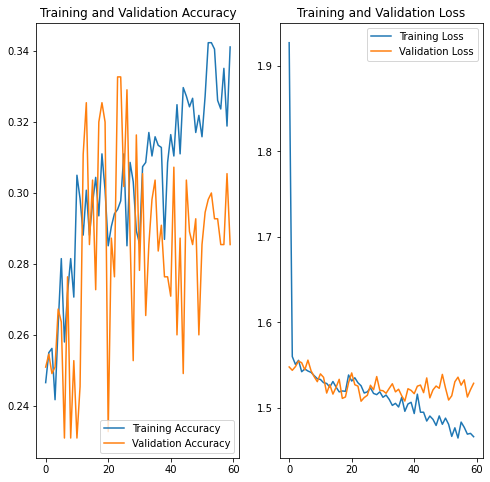

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
preds = model.evaluate(test_ds)

In [ ]:
def load_train(train_ds_path, image_size, classes):
    images = []
    labels = []
    img_names = []
    cls = []

    print('Going to read training images')
    for fields in classes:
        index = classes.index(fields)
        print('Now going to read {} files (Index: {})'.format(fields, index))
        path = os.path.join(train_path, fields, '*g')
        files = glob.glob(path)
        for fl in files:
            image = cv2.imread(fl,0)
            image = cv2.resize(image, (image_size, image_size), 0, 0, cv2.INTER_LINEAR)
            image = image.astype(np.float32)
            image = np.multiply(image, 1.0 / 255.0)
            image1 = image.reshape(50,50,1)
            images.append(image1)
            label = np.zeros(len(classes))
            label[index] = 1.0
            labels.append(label)
            flbase = os.path.basename(fl)
            img_names.append(flbase)
            cls.append(fields)
    images = np.array(images)
    labels = np.array(labels)
    img_names = np.array(img_names)
    cls = np.array(cls)

    return images, labels, img_names, cls

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_ds_path,
  validation_split=0.2,
  subset="training",
  seed=123,
 image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
  )


# **Visualize the data**
Here are the first nine images from the training dataset:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

NameError: ignored

<Figure size 720x720 with 0 Axes>